In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import ttest_1samp,wilcoxon,mannwhitneyu,levene,shapiro,ttest_ind,iqr
from statsmodels.stats.power import ttest_power
import scipy.stats as stats
import math



In [2]:
df= pd.read_csv('SM4-Golf.csv')

In [3]:
df

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262
5,283,251
6,258,262
7,266,289
8,259,286
9,270,264


In [4]:
df.head()


,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [5]:
df.tail()

,Current,New
35,267,263
36,279,261
37,274,255
38,276,263
39,262,279


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Current    40 non-null int64
New        40 non-null int64
dtypes: int64(2)
memory usage: 720.0 bytes


In [7]:
df.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC679C5E80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001EC67C6FB70>]], dtype=object)

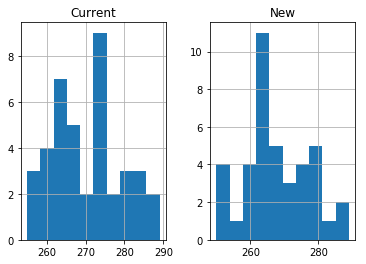

In [8]:
df.hist()

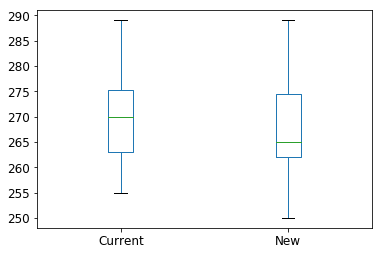

In [9]:
df.boxplot(grid=False,fontsize=12)

In [10]:
Current = df.iloc[:,0]

In [11]:
Current

0     264
1     261
2     267
3     272
4     258
5     283
6     258
7     266
8     259
9     270
10    263
11    264
12    284
13    263
14    260
15    283
16    255
17    272
18    266
19    268
20    270
21    287
22    289
23    280
24    272
25    275
26    265
27    260
28    278
29    275
30    281
31    274
32    273
33    263
34    275
35    267
36    279
37    274
38    276
39    262
Name: Current, dtype: int64

In [12]:
iqr(Current, rng = (25,75))

12.25

In [13]:
meanC = Current.mean()
meanC

270.275

In [14]:
varC = Current.var()
varC

76.61474358974361

In [15]:
New = df.iloc[:,1]

In [16]:
New

0     277
1     269
2     263
3     266
4     262
5     251
6     262
7     289
8     286
9     264
10    274
11    266
12    262
13    271
14    260
15    281
16    250
17    263
18    278
19    264
20    272
21    259
22    264
23    280
24    274
25    281
26    276
27    269
28    268
29    262
30    283
31    250
32    253
33    260
34    270
35    263
36    261
37    255
38    263
39    279
Name: New, dtype: int64

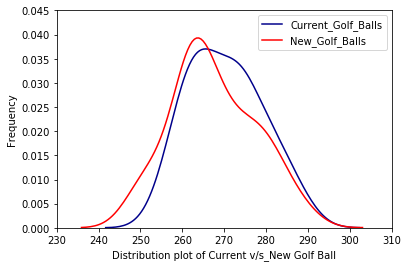

In [17]:
sns.distplot(Current,color='darkblue',hist=False,label='Current_Golf_Balls')
sns.distplot(New,color='red',hist=False,label='New_Golf_Balls')
plt.legend(loc='upper right')
ax=plt.gca()
ax.set_ylim([0,.045])
ax.set_xlim([230,310])
plt.xlabel('Distribution plot of Current v/s_New Golf Ball')
plt.ylabel('Frequency')
plt.show()

In [18]:
meanN = New.mean()
meanN

267.5

In [19]:
iqr(New, rng = (25,75))

12.5

In [20]:
varN= New.var()
varN

97.94871794871794

In [21]:
shapiro(Current)


(0.9707046747207642, 0.378787100315094)

In [22]:
shapiro(New)

(0.9678263664245605, 0.3064655363559723)

In [23]:
t_statistic,p_value = ttest_ind(Current,New)
print(t_statistic,p_value)

1.32836159352 0.187932284919


In [24]:
levene(Current,New)

LeveneResult(statistic=0.25532382917657409, pvalue=0.61477595233313087)

In [25]:
Pooledstd = np.sqrt(((40-1)*varC+ (40-1)*varN)/(40+40-2))
Pooledstd

9.3424692008714043

In [26]:
delta = (meanC - meanN)/Pooledstd
delta

0.29703068218208772

In [27]:
print(ttest_power(delta, nobs = 40, alpha = 0.05, alternative = 'two-sided'))

0.449274188539


In [37]:
print(ttest_power(delta, nobs =198, alpha = 0.05, alternative = 'two-sided'))

0.986067051943


print(ttest_power(delta, nobs = 40, alpha = 0.05, alternative = 'two-sided'))

In [29]:
z_critical_Current= stats.norm.ppf(q=.975)
z_critical_Current

1.959963984540054

In [30]:
stderror_Current= 8.752/math.sqrt(40)
stderror_Current

1.3838127040896828

In [31]:
CI_Lower_Current = meanC -z_critical_Current*stderror_Current
CI_Upper_Current = meanC + z_critical_Current*stderror_Current

In [32]:
CI_Lower_Current,CI_Upper_Current

(267.56277693863524, 272.98722306136472)

In [33]:
z_critical_New= stats.norm.ppf(q=.975)
z_critical_New

1.959963984540054

In [34]:
stderror_New= 9.89/math.sqrt(40)
stderror_New

1.5637463029532637

In [35]:
CI_Lower_New = meanC -z_critical_New*stderror_New
CI_Upper_New = meanC + z_critical_New*stderror_New

In [36]:
CI_Lower_New,CI_Upper_New

(267.21011356525395, 273.33988643474601)